## Wether the factors of  other planets can influence on the earthquake?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap

In [2]:
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline


In [3]:
df = pd.DataFrame.from_csv("SolarSystemAndEarthquakes.csv")
df.head()

,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
earthquake.time,,,,,,,,,,,,,,,,,,,,,
2016-04-29 01:33:38.940,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
2016-04-28 19:33:24.420,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2016-04-20 08:33:47.600,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
2016-04-16 23:58:37.280,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
2016-04-15 16:25:06.260,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,22:28:02,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


#From the basic data from website, I find I should divide the form into several parts. The one is about the details of earthquake, another is the details of other planet in order to continue the analysis.

In [4]:
data1= pd.DataFrame.from_csv("e1.csv")
df.head()

,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
earthquake.time,,,,,,,,,,,,,,,,,,,,,
2016-04-29 01:33:38.940,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
2016-04-28 19:33:24.420,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2016-04-20 08:33:47.600,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
2016-04-16 23:58:37.280,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
2016-04-15 16:25:06.260,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,22:28:02,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


#this part rebuilt the dataset of the earthquake details without the data of the other planets

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

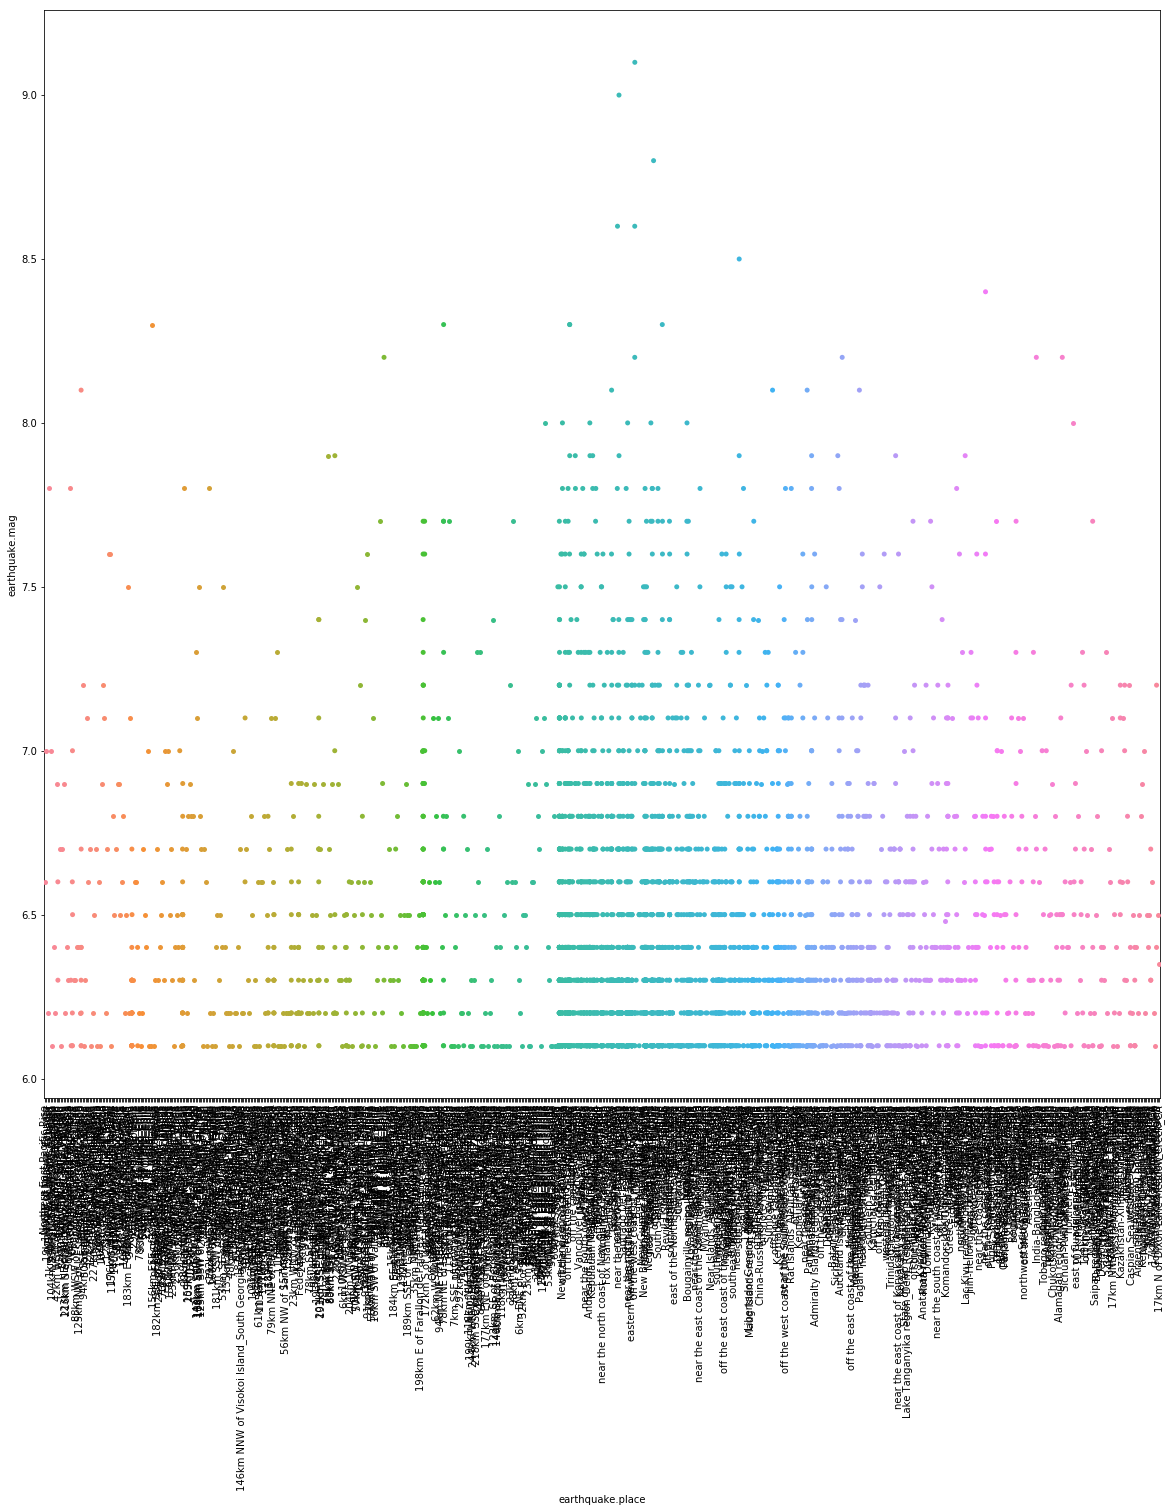

In [5]:
plt.subplots(figsize=(20,20))
g = sns.stripplot(x="earthquake.place", y="earthquake.mag", data=data1, jitter=True)
plt.xticks(rotation=90)

#this part show the relationship between the place&time and mag.we can easily find the peak time of  earthquake.

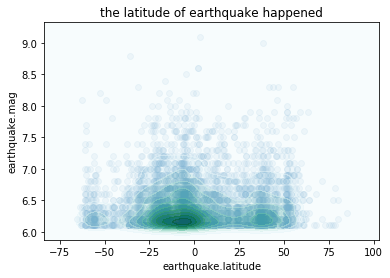

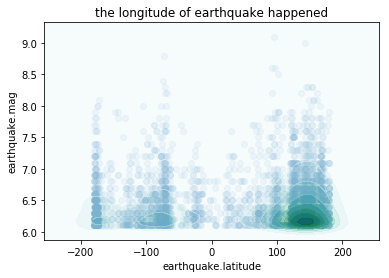

In [6]:
plt.scatter(df['earthquake.latitude'], df['earthquake.mag'], alpha=0.1,)
sns.kdeplot(df['earthquake.latitude'], df['earthquake.mag'], alpha=0.5,shade=True)
plt.xlabel('earthquake.latitude')
plt.ylabel('earthquake.mag')
plt.title('the latitude of earthquake happened')
plt.show()


plt.scatter(df['earthquake.longitude'], df['earthquake.mag'], alpha=0.1,)
sns.kdeplot(df['earthquake.longitude'], df['earthquake.mag'], alpha=0.5,shade=True)
plt.xlabel('earthquake.latitude')
plt.ylabel('earthquake.mag')
plt.title('the longitude of earthquake happened')
plt.show()

#In this part show the main central of the earthquake in the latitude and longitude,with(-25,-0)and(100,200)respectively. Why these figures concentrate on this area?

In [7]:
df = pd.read_csv("s2.csv")
df.head()

,earthquake.time,latitude,longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
4,2016-04-15T16:25:06.260Z,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


/Users/Mrlucifer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/Mrlucifer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/Mrlucifer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



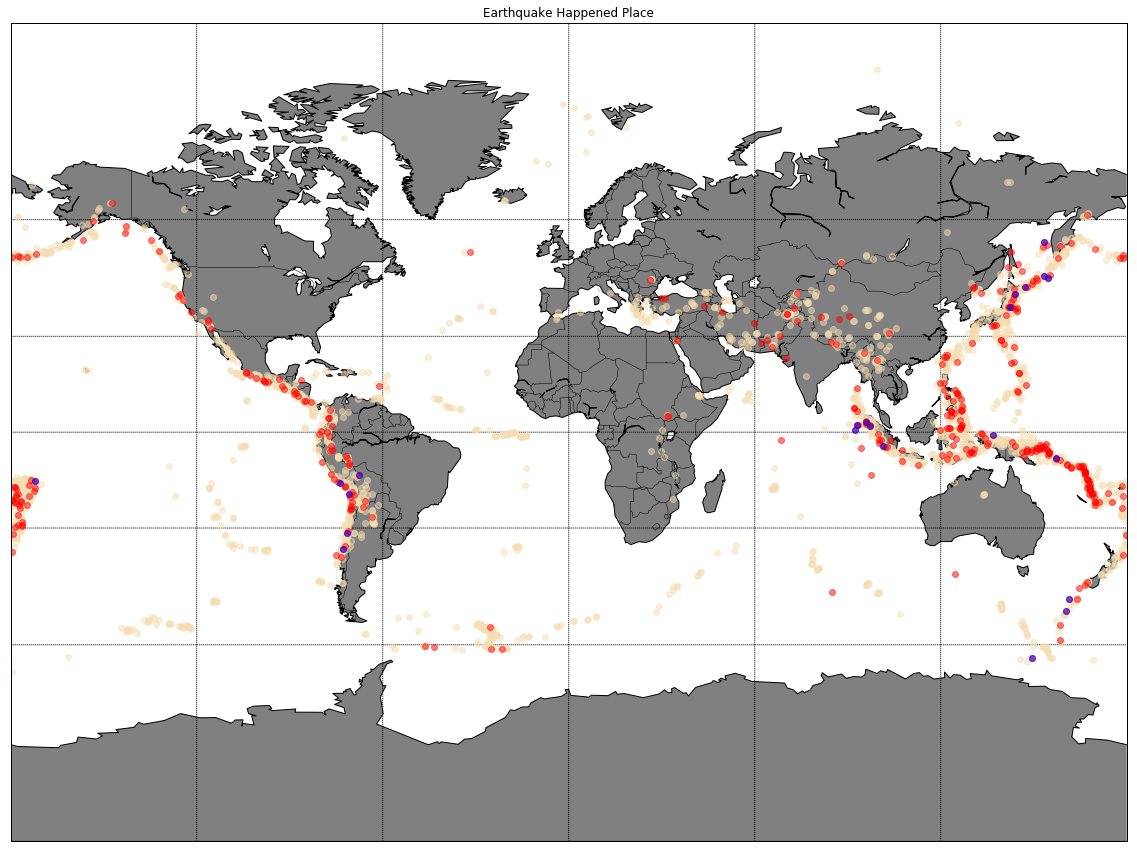

In [8]:
plt.subplots(figsize=(20,20))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')  
m.drawcoastlines()  
m.drawcountries() 
m.fillcontinents(color='grey',lake_color='white')  
# draw parallels and meridians.  
m.drawparallels(np.arange(-90.,91.,30.))  
m.drawmeridians(np.arange(-180.,181.,60.))  
m.drawmapboundary(fill_color='white')  
plt.title("Earthquake Happened Place")
#this part to draw a world map to show the earthquake happened place and the mag of it.

lon = list(df[df['earthquake.mag']<=7.0].longitude)
lat = list(df[df['earthquake.mag']<=7.0].latitude)
xpt,ypt = m(lon,lat)
#make victor transfer from lat,lon to plt
lonpt, latpt = m(xpt,ypt,inverse=True)
#transfer from the victor of plt tolat,lon  
m.plot(xpt,ypt,'bo',color='wheat',alpha=0.5)


lon1 = list(df[df['earthquake.mag']>7.0].longitude)
lat1 = list(df[df['earthquake.mag']>7.0].latitude)
xpt1,ypt1 = m(lon1,lat1)
#make victor transfer from lat,lon to plt
lonpt1, latpt1 = m(xpt1,ypt1,inverse=True)
#transfer from the victor of plt tolat,lon  
m.plot(xpt1,ypt1,'bo',color='red',alpha=0.5)

lon2 = list(df[df['earthquake.mag']>8.0].longitude)
lat2 = list(df[df['earthquake.mag']>8.0].latitude)
xpt2,ypt2 = m(lon2,lat2)
#make victor transfer from lat,lon to plt
lonpt2, latpt2 = m(xpt2,ypt2,inverse=True)
#transfer from the victor of plt tolat,lon  
m.plot(xpt2,ypt2,'bo',color='blue',alpha=0.5)





plt.show()



#this part is show the mainly area of different earthquake mag,and the accuracy position of the earthquake happened places.It is easy to see that almost all the earthquake happened near the recdascension. And as we know the earthquake is related to the other planets changing.So how about the changes of the other planets can effect the earthquake?

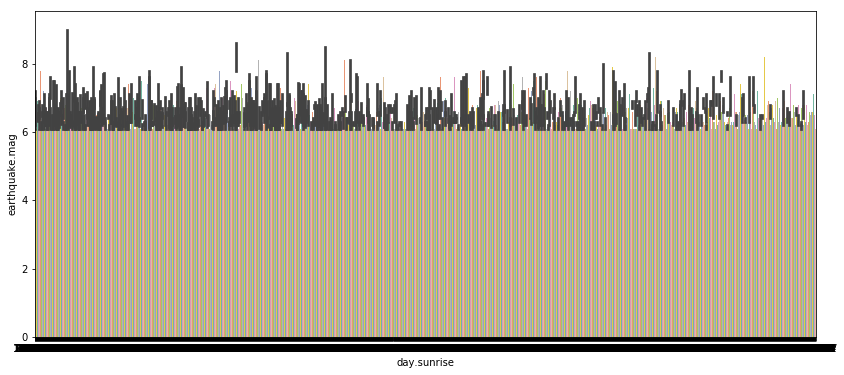

In [9]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='day.sunrise',y='earthquake.mag', data=df, palette = 'Set2')
ax.set(xlabel='day.sunrise', ylabel='earthquake.mag')

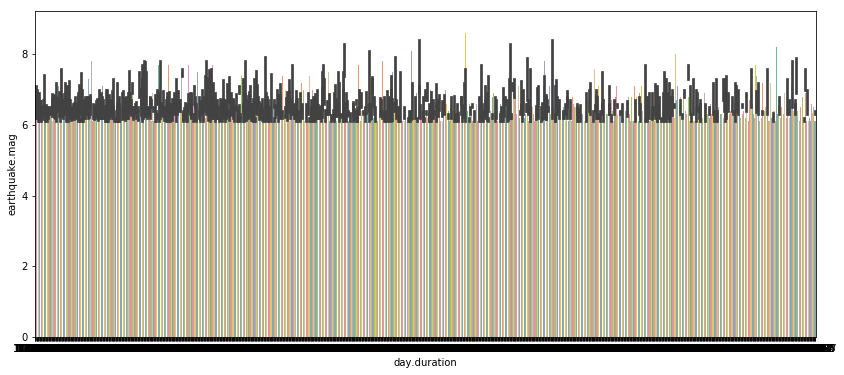

In [10]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='day.duration',y='earthquake.mag', data=df, palette = 'Set2')
ax.set(xlabel='day.duration', ylabel='earthquake.mag')

In [11]:
#From these 2 gragh,it is likely to get the relationship between the sunrise and day duration,which is effected by the sun.
#So, i want to verify it by the current datas.

#there are some specific datas of moon,firstly I want to do some explore on it.

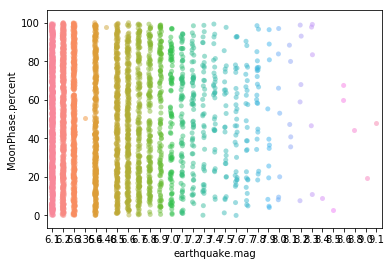

In [12]:
ax = sns.stripplot(x="earthquake.mag", y="MoonPhase.percent", data=df,jitter=True,alpha=0.5)

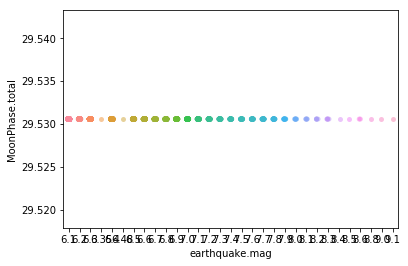

In [13]:
ax = sns.stripplot(x="earthquake.mag", y="MoonPhase.total", data=df,jitter=True,alpha=0.5)

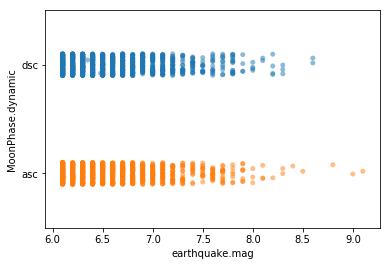

In [14]:
ax = sns.stripplot(x="earthquake.mag", y="MoonPhase.dynamic", data=df,jitter=True,alpha=0.5)

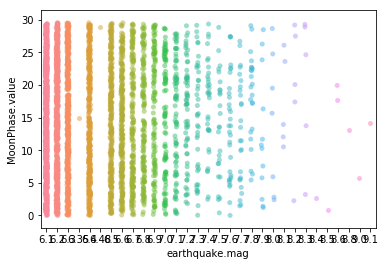

In [15]:
ax = sns.stripplot(x="earthquake.mag", y="MoonPhase.value", data=df,jitter=True,alpha=0.5)

#it is obvious that these details of moon are no effects on earthquake.

In [16]:
data2 = pd.read_csv("s1.csv")

##this part rebuilt the dataset of the other planets without the data of the earth.

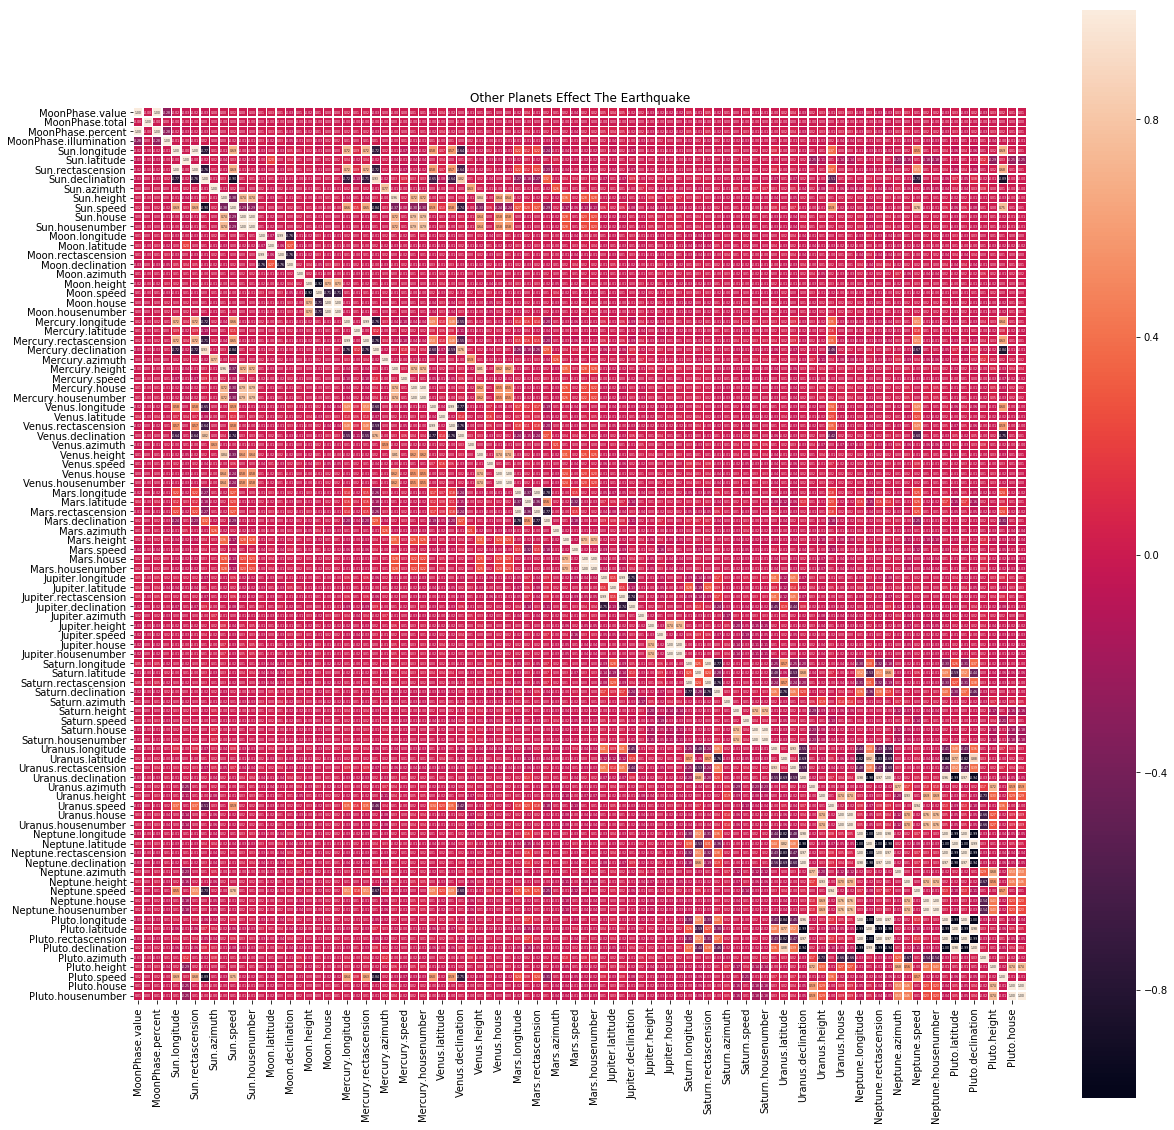

In [17]:
plt.subplots(figsize=(20,20))
corr = data2.corr()
sns.heatmap(corr, cbar = True, square=True, annot=True, linewidths = .5,  fmt='.2f',annot_kws={'size': 3} )
plt. title('Other Planets Effect The Earthquake')
plt.show()

#this part show the relationship between the earthquake and different factors of other planets.Obviously,the main data shows in the visualization is between 0 to 0.1.So , it is hard to say the other planets can effects on the earthquake.How about each details in every planet influence the earthquake?

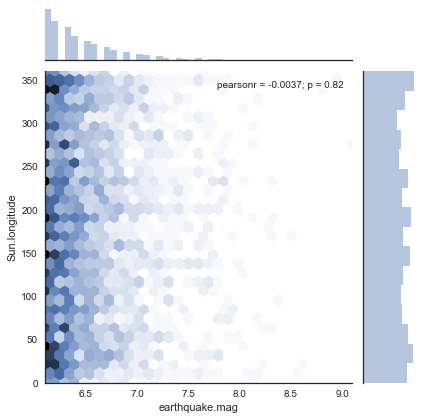

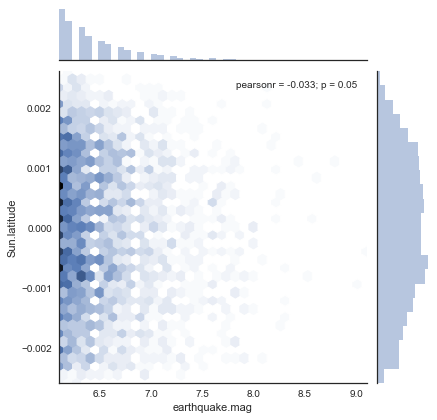

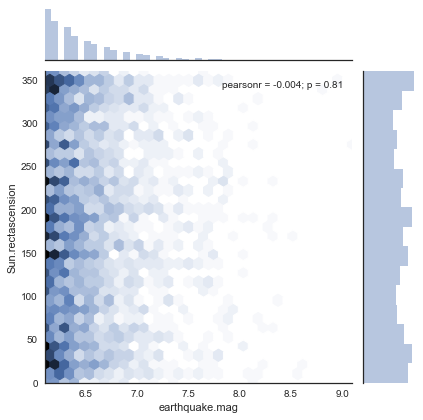

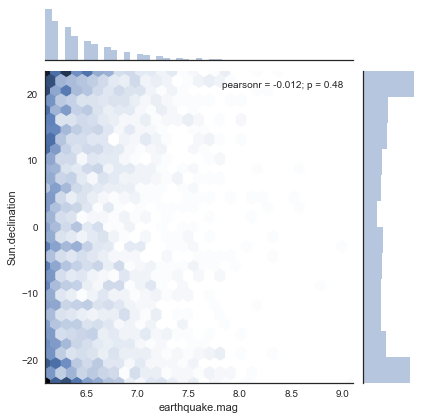

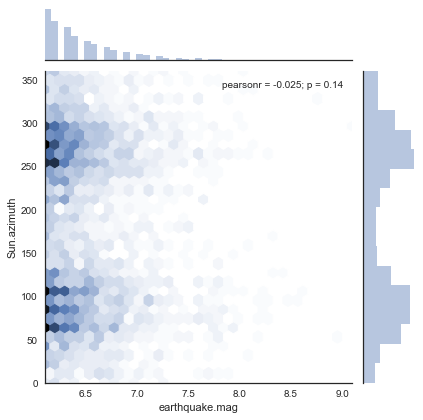

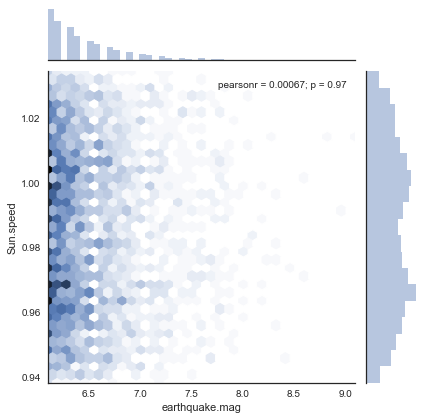

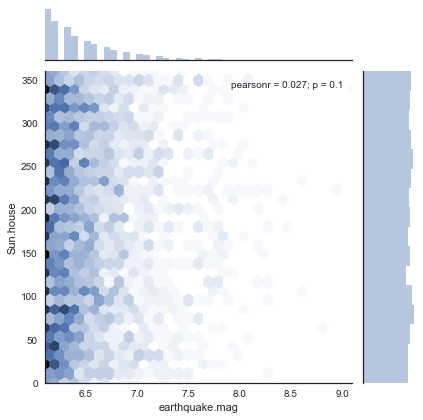

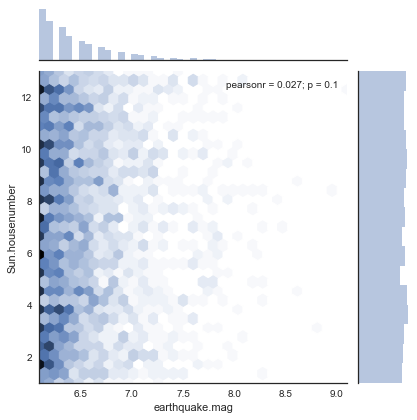

In [18]:
sns.set(style="white", color_codes=True)
tips =pd.read_csv("SolarSystemAndEarthquakes.csv")


g = sns.jointplot("earthquake.mag", "Sun.longitude", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.latitude", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.rectascension", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.declination", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.azimuth", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.speed", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.house", data=tips, kind="hex")
g = sns.jointplot("earthquake.mag", "Sun.housenumber", data=tips, kind="hex")

#this part is a sample of all the planets,the details of the sun, in these graphs it's also have sightly effects on earthquake.And it has the similar datas in the other planets.

In [ ]:
heights= pd.read_csv("height2.csv")
heights.head()

,earthquake.mag,Sun.height,Moon.height,Mercury.height,Venus.height,Mars.height,Jupiter.height,Saturn.height,Uranus.height,Uranus.speed,Uranus.house,Uranus.housenumber,Neptune.height,Pluto.height
0,6.6,-7.267641,-69.963160,6.825736,-17.420505,-21.474840,62.122859,-29.010804,-24.732606,0.054950,154.005108,6.133504,-64.151005,-60.711436
1,7.0,6.583704,66.632132,-8.077569,16.997430,22.584717,-62.046295,29.943406,23.991351,0.055444,333.783924,12.126131,64.024787,61.913464
2,6.2,-40.258031,22.269301,-53.738780,-29.885701,65.890659,-1.362386,68.352618,-32.141983,0.057240,32.516090,2.083870,3.950142,52.338472
3,7.8,-9.583918,61.683272,8.163960,-21.774451,-29.731000,48.916184,-36.814367,-15.581881,0.056571,164.265836,6.475528,-51.680706,-63.936274
4,7.0,-44.158685,9.963212,-38.333755,-44.294444,30.493342,33.052704,27.346530,-44.616332,0.057556,66.905711,3.230190,-30.877433,6.217801


In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="earthquake.mag")
plt.show()

#because the heights of different planets will bring different gravitations,So this part is mainly show the relationship between height and earthquake mag.

In [ ]:
#On conclusion,the main central of the earthquake in the latitude and longitude,with(-25,-0)and(100,200)respectively.While the sunrise and day duration looks like having some influences on earthquake,but it is cannot verify it. Finally,according to analysis,it is really no effects on earthquake.In this analysis we can get rid of the other influnces come from the other planets. 